### Егоров Борис

### ДЗ 3

## 0. Разобраться с minimap2

`minimap2 -a reference.fasta pacbio_40x.fq > pacbio_40x.sam`

`samtools flagstat pacbio_40x.sam`

<pre>
49743 + 0 in total (QC-passed reads + QC-failed reads)
1528 + 0 secondary
6768 + 0 supplementary
0 + 0 duplicates
48434 + 0 mapped (97.37% : N/A)
0 + 0 paired in sequencing
0 + 0 read1
0 + 0 read2
0 + 0 properly paired (N/A : N/A)
0 + 0 with itself and mate mapped
0 + 0 singletons (N/A : N/A)
0 + 0 with mate mapped to a different chr
0 + 0 with mate mapped to a different chr (mapQ>=5)
</pre>

97.37% приложившихся ридов

`minimap2 -a reference.fasta ONT_2D.fastq > ONT_2D.sam`

`samtools flagstat ONT_2D.sam`

<pre>
32103 + 0 in total (QC-passed reads + QC-failed reads)
1072 + 0 secondary
221 + 0 supplementary
0 + 0 duplicates
29565 + 0 mapped (92.09% : N/A)
0 + 0 paired in sequencing
0 + 0 read1
0 + 0 read2
0 + 0 properly paired (N/A : N/A)
0 + 0 with itself and mate mapped
0 + 0 singletons (N/A : N/A)
0 + 0 with mate mapped to a different chr
0 + 0 with mate mapped to a different chr (mapQ>=5)
</pre>

92.09% приложившихся ридов

## 1. Статистики ридов PacBio и Oxford Nanopores.

### Oxford Nanopores

#### Покрытие генома

`bioawk -c fastx '{ print $name, length($seq) }' < reference.fasta`

gi|48994873|gb|U00096.2|	4639675

`samtools view -S -b ONT_2D.sam > ONT_2D.bam`

`samtools view -S -b ONT_2D.sam > ONT_2D.bam`

`samtools sort ONT_2D.bam -o ONT_2D.sorted.bam`

`bedtools genomecov -bga -ibam ONT_2D.sorted.bam | sort -k1,1 -k2,2n > ONT_2D.BEDGRAPH`

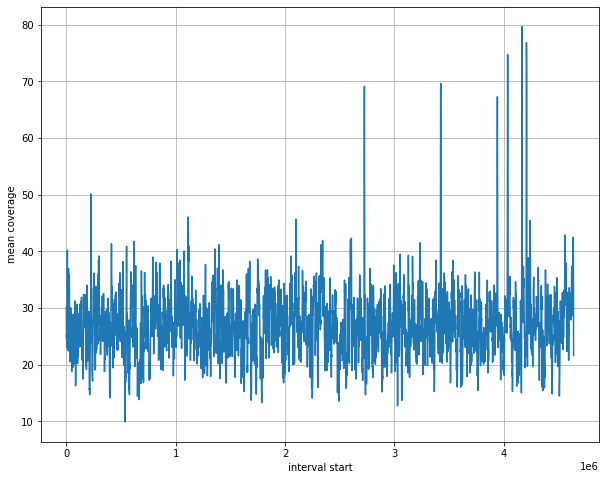

In [1]:
from pyBedGraph import BedGraph
import matplotlib.pyplot as plt

inclusive_bedGraph = BedGraph('ONT_2D.sizes', 'ONT_2D.BEDGRAPH', ignore_missing_bp=False)

inclusive_bedGraph.load_chrom_data('gi|48994873|gb|U00096.2|')

start_list = list(range(0, 4640000, 1000))
end_list   = list(range(1000, 4641000, 1000))

result = inclusive_bedGraph.stats('mean', start_list=start_list, end_list=end_list, chrom_name='gi|48994873|gb|U00096.2|')

fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(8)
ax.plot(start_list, result)
ax.set_xlabel('interval start')
ax.set_ylabel('mean coverage')
ax.grid(True)
plt.show()

длина покрытого генома

`awk '$4 > 0 {sum += $3 - $2} END {print sum}' ONT_2D.BEDGRAPH`

4638867

#### Процент ошибок

`samtools stats ONT_2D.sorted.bam | grep 'error rate'`

SN	error rate:	8.109271e-02	# mismatches / bases mapped (cigar)

8%

#### Распределение типов замен

#### Распределение длин инделов

`samtools stats ONT_2D.sam | egrep '^ID' | cut -f 2-`


length | number of insertions | number of deletions
<pre>
1	525344	1897085
2	207341	758942
3	81779	368504
4	31719	145775
5	14057	71921
6	6762	41815
7	3555	22268
8	1995	13439
9	1186	9334
10	684	5692
11	445	3451
12	262	2605
13	146	1597
14	87	1055
15	58	828
16	39	537
17	33	345
18	21	240
19	14	187
20	11	118
21	3	109
22	10	108
23	6	95
24	4	77
25	6	66
26	1	58
27	4	52
28	6	44
29	2	27
30	3	28
31	4	32
32	5	33
33	5	23
34	3	21
35	1	21
36	5	15
37	4	14
38	2	10
39	2	10
40	2	12
41	1	7
42	1	13
43	1	9
44	2	11
45	2	11
46	0	4
47	2	2
48	1	11
49	1	8
50	1	4
51	1	3
52	2	3
53	2	3
54	2	6
55	0	2
56	1	9
57	0	2
58	0	3
59	1	6
60	1	5
61	0	4
62	2	0
63	0	3
64	1	0
65	0	4
66	1	3
67	1	2
68	0	7
69	0	3
70	0	2
71	1	5
72	0	3
73	1	3
74	1	4
75	0	3
76	0	3
77	0	6
78	0	2
79	0	1
81	0	2
82	1	2
83	2	0
84	1	0
88	1	2
89	0	1
90	0	2
91	0	1
92	1	0
93	0	1
94	0	3
95	1	3
96	0	2
97	0	1
98	0	1
99	0	1
101	0	1
102	0	2
103	0	1
105	1	2
107	0	4
108	1	3
109	0	2
110	0	1
111	1	8
112	1	5
113	0	6
114	2	0
115	0	2
116	0	3
117	0	2
118	0	3
119	0	2
120	0	2
121	0	1
122	0	2
123	1	1
126	0	1
127	1	0
128	1	1
129	1	1
131	0	2
132	0	2
135	1	2
139	1	1
140	0	1
143	1	0
146	2	1
148	2	0
149	0	3
150	0	1
152	1	1
153	2	1
155	2	0
156	2	0
157	0	1
158	0	1
159	1	1
160	0	1
161	2	0
162	3	0
163	2	0
164	1	0
165	4	0
166	2	0
167	1	0
168	3	1
169	0	1
170	1	0
171	2	0
172	0	1
173	1	0
174	2	1
179	0	1
181	0	1
182	0	2
183	0	1
185	1	0
186	1	0
188	0	1
189	1	0
190	1	0
193	1	0
194	1	0
196	1	0
197	2	0
198	0	1
203	0	1
211	1	0
213	0	1
215	0	1
226	1	0
228	2	0
229	1	0
234	1	0
236	1	0
242	1	0
256	0	1
267	1	0
277	1	0
280	1	0
282	1	0
296	1	0
</pre>

### PacBio

#### Покрытие генома

`samtools view -S -b pacbio_40x.sam > pacbio_40x.bam`

`samtools view -S -b pacbio_40x.sam > pacbio_40x.bam`

`samtools sort pacbio_40x.bam -o pacbio_40x.sorted.bam`

`bedtools genomecov -bga -ibam pacbio_40x.sorted.bam | sort -k1,1 -k2,2n > pacbio_40x.BEDGRAPH`

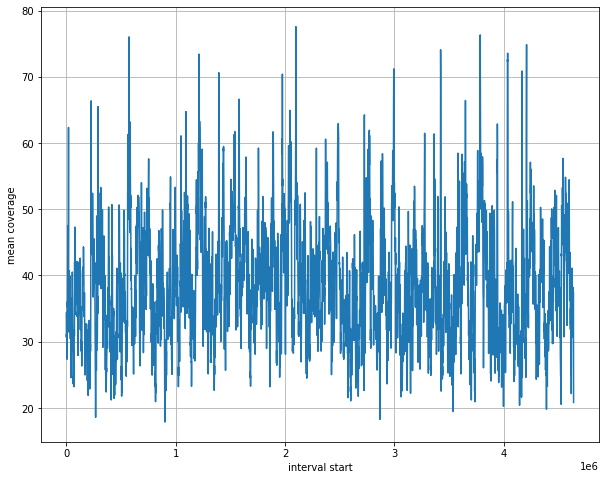

In [2]:
inclusive_bedGraph = BedGraph('pacbio_40x.sizes', 'pacbio_40x.BEDGRAPH', ignore_missing_bp=False)

inclusive_bedGraph.load_chrom_data('gi|48994873|gb|U00096.2|')

start_list = list(range(0, 4640000, 1000))
end_list   = list(range(1000, 4641000, 1000))

result = inclusive_bedGraph.stats('mean', start_list=start_list, end_list=end_list, chrom_name='gi|48994873|gb|U00096.2|')

fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(8)
ax.plot(start_list, result)
ax.set_xlabel('interval start')
ax.set_ylabel('mean coverage')
ax.grid(True)
plt.show()

длина покрытого генома

`awk '$4 > 0 {sum += $3 - $2} END {print sum}' pacbio_40x.BEDGRAPH`

4639675

#### Процент ошибок

`samtools stats pacbio_40x.sorted.bam | grep 'error rate'`

SN	error rate:	1.420957e-01	# mismatches / bases mapped (cigar)

14%

#### Распределение типов замен

#### Распределение длин инделов

`samtools stats pacbio_40x.sam | egrep '^ID' | cut -f 2-`

length | number of insertions | number of deletions
<pre>
1	8002082	5017580
2	1669491	657032
3	489159	113130
4	193685	32598
5	95802	12624
6	52842	5682
7	32569	3276
8	20722	1984
9	13803	1268
10	9791	813
11	6926	515
12	5027	369
13	3821	282
14	2805	184
15	2149	125
16	1673	98
17	1204	66
18	983	39
19	710	36
20	562	18
21	641	21
22	647	30
23	629	18
24	638	23
25	637	20
26	571	31
27	566	24
28	535	26
29	492	24
30	482	17
31	412	23
32	384	19
33	344	20
34	348	29
35	324	20
36	283	11
37	297	16
38	267	23
39	216	5
40	261	10
41	208	7
42	189	6
43	193	3
44	183	6
45	187	7
46	154	4
47	167	7
48	176	2
49	163	7
50	150	3
51	121	3
52	112	6
53	127	5
54	78	5
55	90	1
56	110	5
57	79	0
58	88	5
59	64	7
60	97	2
61	78	1
62	69	2
63	70	1
64	65	1
65	60	6
66	70	3
67	54	3
68	58	3
69	57	2
70	57	3
71	53	2
72	52	1
73	47	2
74	46	2
75	52	2
76	38	2
77	51	3
78	37	3
79	38	1
80	33	2
81	43	2
82	34	3
83	30	1
84	36	2
85	27	1
86	31	1
87	27	1
88	30	2
89	22	2
90	26	0
91	32	0
92	32	1
93	25	1
94	22	0
95	26	0
96	26	5
97	24	1
98	24	1
99	21	1
100	18	2
101	19	1
102	21	3
103	14	0
104	16	1
105	21	0
106	15	2
107	21	2
108	20	2
109	22	4
110	14	11
111	6	7
112	21	6
113	12	1
114	14	2
115	9	1
116	10	1
117	11	0
118	24	1
119	12	1
120	10	0
121	7	1
122	5	0
123	17	1
124	10	0
125	7	0
126	16	1
127	9	0
128	14	0
129	18	0
130	8	1
131	7	0
132	14	0
133	15	0
134	16	0
135	7	0
136	9	0
137	10	2
138	13	0
139	9	0
140	9	0
141	11	0
142	2	0
143	1	0
144	2	0
145	4	0
146	10	1
147	4	1
148	4	0
149	2	0
150	10	0
151	5	0
152	10	0
153	10	2
154	4	0
155	4	0
156	9	0
157	4	0
158	7	0
159	8	0
160	4	0
161	10	1
162	10	0
163	8	0
164	6	0
165	2	1
166	7	0
167	3	0
168	4	0
169	8	0
170	2	1
171	10	0
172	4	0
173	4	0
174	4	0
175	3	0
176	10	0
177	7	0
178	1	0
179	3	0
180	8	1
181	6	0
182	4	0
183	7	1
184	5	0
185	8	0
186	6	0
187	6	0
188	7	0
189	4	0
190	2	0
191	1	0
192	5	0
193	6	0
194	2	0
195	2	0
196	5	1
198	2	1
199	5	0
200	3	0
201	4	0
202	2	0
203	1	1
204	3	0
205	3	0
206	4	0
207	1	0
208	4	0
209	5	0
210	1	0
211	3	0
212	2	0
213	6	1
214	3	0
215	1	0
216	4	0
217	1	0
218	1	0
219	3	0
220	1	0
221	2	1
222	5	0
223	1	0
225	3	0
227	4	1
229	2	0
230	2	0
231	4	0
232	2	0
233	5	0
234	2	1
235	2	0
236	1	0
237	2	0
238	1	0
239	2	0
240	3	0
242	1	0
243	4	0
245	2	0
246	1	0
247	2	0
248	1	0
249	1	0
250	1	0
252	1	0
254	2	0
256	0	1
257	1	0
258	3	0
259	2	0
260	2	1
261	1	0
262	2	0
263	1	1
264	1	0
265	2	1
266	0	1
268	2	0
269	3	0
270	2	0
271	3	0
273	2	0
274	3	0
276	2	0
277	1	0
278	0	1
279	1	0
280	1	0
282	1	0
283	1	0
284	1	0
285	2	0
286	1	0
287	1	0
288	1	0
289	2	0
290	1	0
294	1	0
295	1	0
296	2	0
298	1	0
</pre>

### Сравнение результатов